In [1]:
# here's all our "standard" imports and libraries to use for this p-jam.. 

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [3]:
# first, read and clean several CSV files for analysis. The CSV files include whale portfolio 
# returns, algorithmic trading portfolio returns, and S&P 500 historical prices.

In [4]:
# reading whale 
whale_returns = Path("resources/whale_returns.csv")
# convert date
whale_returns = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)

#stick in a var 
whale_returns.sort_index(ascending = True, inplace = True)
#print to review info
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# look for amount of nulls, keep track. future note: can I do count and drop at same time somehow?
print(whale_returns.isnull().sum())
#

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [6]:
# drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# the algo trade file file 

# Read and clean the data

In [8]:
# reading algo
algo_returns_file = Path("resources/algo_returns.csv")
# convert date 
algo_return = pd.read_csv(algo_returns_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
# stick in var 
algo_return.sort_index(ascending = True, inplace = True)
#print some... show where nulls are in file 
algo_return.head(7)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285


In [9]:
# # look for amount of nulls, keep track.
algo_return.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# drop nulls
algo_return.dropna(inplace = True)
# print
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [11]:
# the S&P 500 CSV file contains closing prices. 
# Convert the S&P 500 closing prices to daily returns.

In [12]:
# Reading sp500, sorting index
sp500_history_file = Path("resources/sp500_history.csv")
# convert date
sp500_hist = pd.read_csv(sp500_history_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_hist.sort_index(ascending = True, inplace = True)
# print some
sp500_hist.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# what are the data types if need to fix 
sp500_hist.dtypes

Close    object
dtype: object

In [14]:
# fix and remove extra junk
sp500_hist["Close"]= sp500_hist["Close"].str.replace('$','').astype("float")
sp500_hist.sort_index(inplace = True)
# print results to validate
sp500_hist

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [15]:
# Convert the S&P 500 closing prices to daily returns, per readme
daily_returns = sp500_hist.pct_change()

In [16]:
# remove nulls
daily_returns.dropna(inplace = True)
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [17]:
# rename column
daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)
# verify..
daily_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# per readme, Join `Whale Returns`, `Algorithmic Returns`, and the 
# `S&P 500 Returns` into a single DataFrame with columns for each portfolio's returns.

In [19]:
# ...single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_return,daily_returns], axis = "columns",join = "inner")
#show... 
df_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

In [20]:
# per readme: Conduct Quantitative Analysis
# Analyze the data to see if any of the portfolios outperform the stock market (i.e., the S&P 500).

In [21]:
# Performance Analysis

# 1. Calculate and plot cumulative returns. 

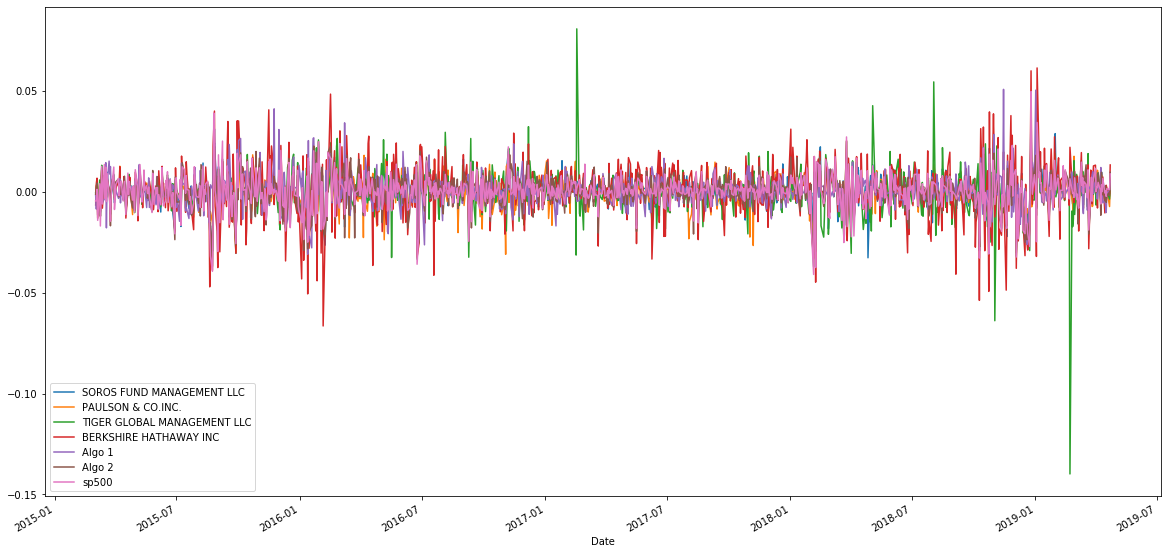

In [22]:
# plot daily returns
df_daily.plot(figsize = (20,10))

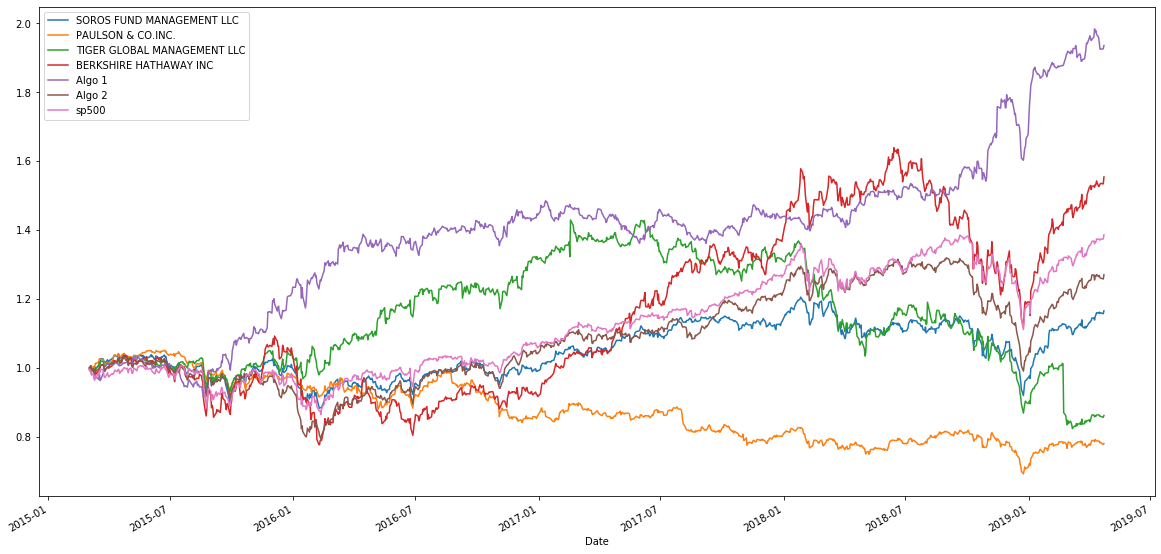

In [23]:
# plot cumulative returns
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

In [24]:
# Risk Analysis

# 1. Create a box plot for each of the returns. Which box has the largest spread? 
# Which has the smallest spread?

# 2. Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

# 3. Calculate the annualized standard deviation (252 trading days).

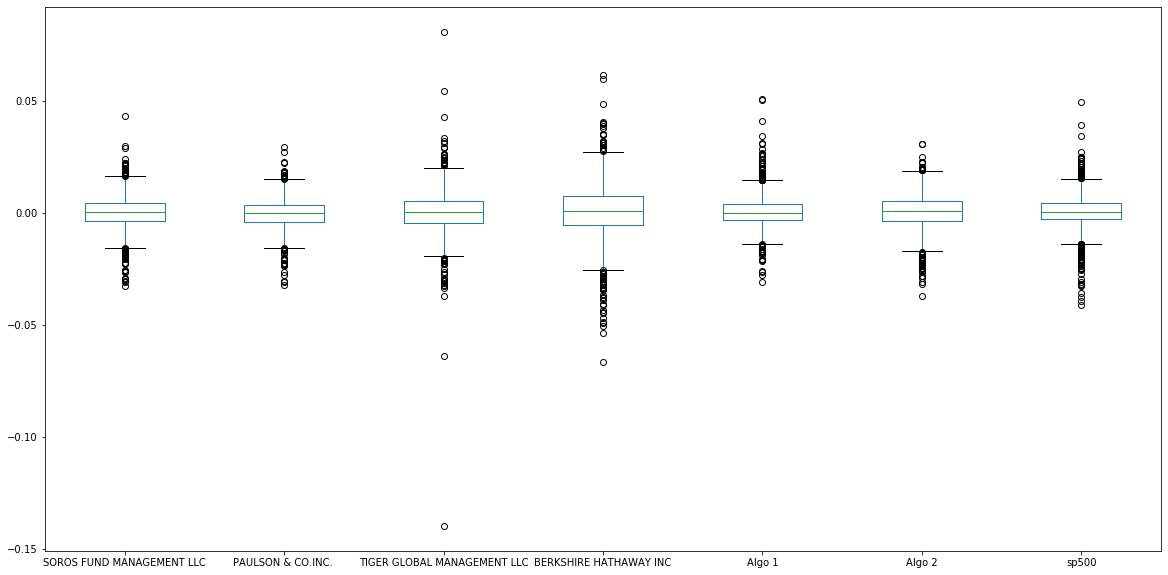

In [25]:
# 1 - 
# box plot Which box has the largest spread? 
# Which has the smallest spread?
df_daily.plot(kind = "box", figsize = (20,10))

In [26]:
# 2 - 
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
# show
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [27]:
# Determine which portfolios are riskier than the S&P 500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
# show
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [28]:
# 3 - 
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
# show
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

In [29]:
# Rolling Statistics

# 1. Plot the rolling standard deviation of the various portfolios along 
# with the rolling standard deviation of the S&P 500 using a 21 day rolling window. 
# Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

# 2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. 
# Which returns most closely mimic the S&P?

# 3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. 
# Does the portfolio seem sensitive to movements in the S&P 500?

# 4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. 
# This is like a moving window average, but it assigns greater importance to more recent observations.
# Try calculating the ewm with a 21 day half-life.



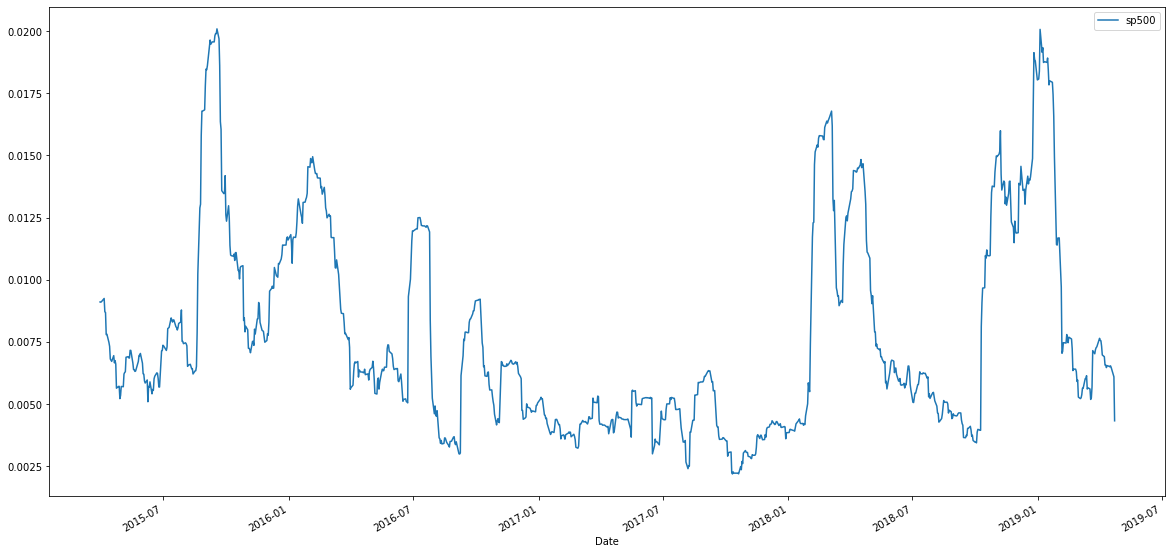

In [30]:
# 1 - 
# plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_rolling_21 = df_daily[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))

In [31]:
# 2 - 
# correlate 
correlation_sp500 = pd.DataFrame(df_daily.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
# show
correlation_sp500

SOROS FUND MANAGEMENT LLC      0.837864
PAULSON & CO.INC.              0.669732
TIGER GLOBAL MANAGEMENT LLC    0.623946
BERKSHIRE HATHAWAY INC         0.751371
Algo 1                         0.279494
Algo 2                         0.858764
sp500                          1.000000
Name: sp500, dtype: float64


Based on correlation output, Algo 2 closely mimics the S&P.. adding scatter chart as a visual



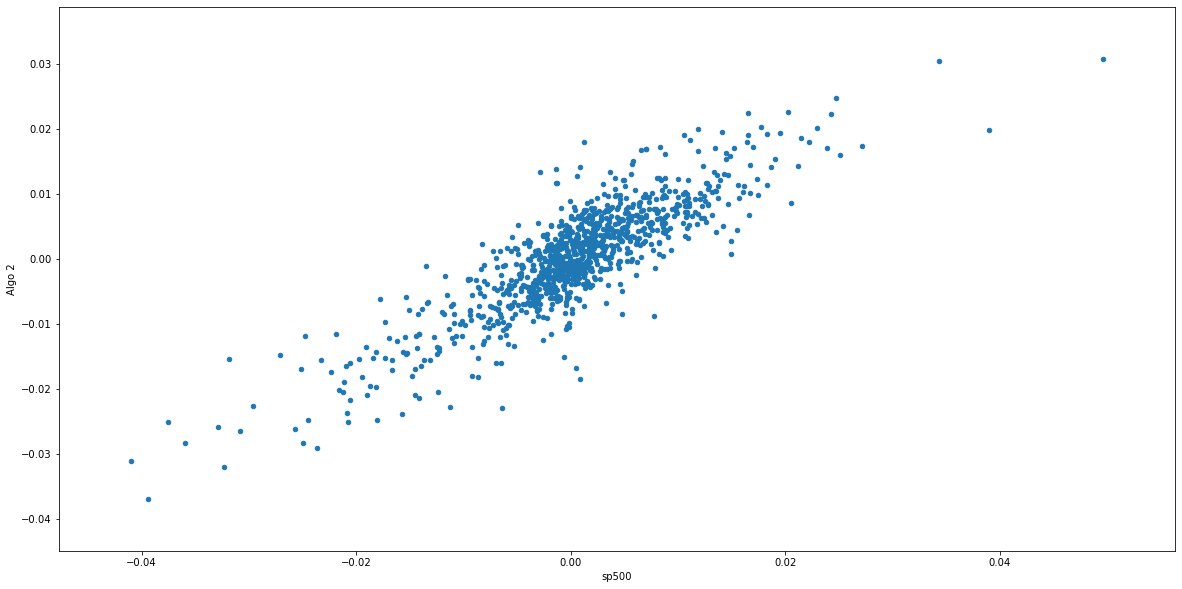

In [32]:
print()
print (f"Based on correlation output, Algo 2 closely mimics the S&P.. adding scatter chart as a visual")
print ()
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

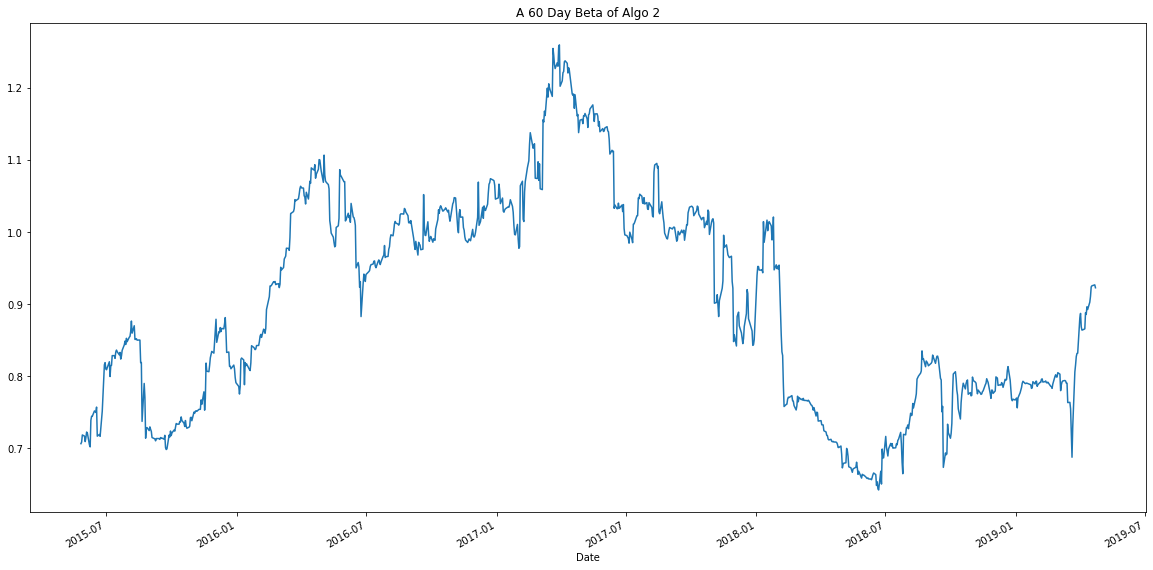

In [70]:
# 3 - 
# plot a rolling beta between that portfolio's returns and S&P 500 returns.
rolling_covariance = df_daily['Algo 2'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='A 60 Day Beta of Algo 2')

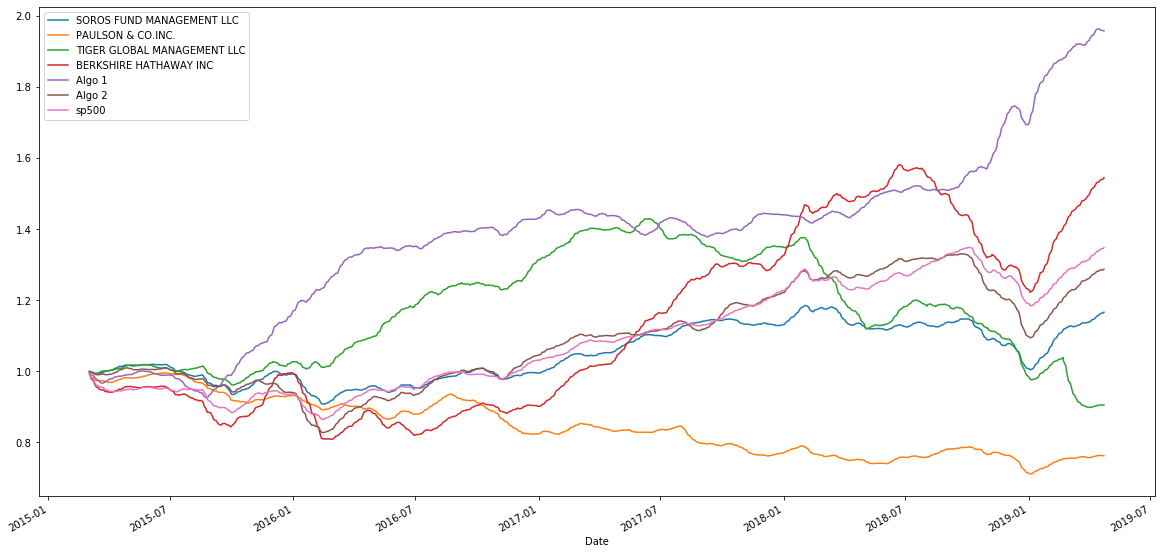

In [34]:
# 4 - 
# calculating the ewm with a 21 day half-life
# and I had to have help and reading time for this, so not sure... 

df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

In [35]:
# #  Plot Sharpe Ratios
# # In reality, investment managers and thier institutional investors look
# at the ratio of return-to-risk, and not just returns alone. 
# (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

# # Calculate and plot the annualized Sharpe ratios for
# all portfolios to determine which portfolio has the best performance

In [36]:
# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
# Annualzied Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
# show
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

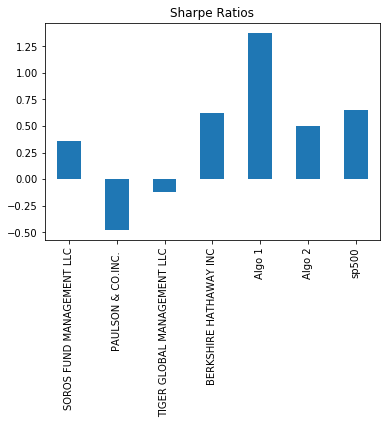

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

---

In [38]:
# Create Custom Portfolio

# In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

# 1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
# 2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# 3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# 4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
# 5. Include correlation analysis to determine which stocks (if any) are correlated

In [39]:
# read apple file
aapl_history = pd.read_csv(Path("resources/ap.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"AAPL"}, inplace = True)
# print some
aapl_history.head()

,AAPL
Date,
2018-02-12 16:00:00,40.68
2018-02-13 16:00:00,41.09
2018-02-14 16:00:00,41.84
2018-02-15 16:00:00,43.25
2018-02-16 16:00:00,43.11


In [40]:
# read amazon
amzn_history = pd.read_csv(Path("resources/am.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
amzn_history.rename(columns = {"Close":"AMZN"}, inplace = True)
# print some
amzn_history.head()

,AMZN
Date,
2018-02-12 16:00:00,1386.23
2018-02-13 16:00:00,1414.51
2018-02-14 16:00:00,1451.05
2018-02-15 16:00:00,1461.76
2018-02-16 16:00:00,1448.69


In [41]:
# read facebook
fb_history = pd.read_csv(Path("resources/fb.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
fb_history.rename(columns = {"Close":"FABK"}, inplace = True)
# print some
fb_history

,FABK
Date,
2018-02-12 16:00:00,176.41
2018-02-13 16:00:00,173.15
2018-02-14 16:00:00,179.52
2018-02-15 16:00:00,179.96
2018-02-16 16:00:00,177.36
...,...
2019-02-07 16:00:00,166.38
2019-02-08 16:00:00,167.33
2019-02-11 16:00:00,165.79


In [42]:
# put all stocks into a single dataframe
my_stocks = pd.concat((aapl_history, amzn_history, fb_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
# print some
my_stocks

,AAPL,AMZN,FABK
Date,,,
2018-02-12 16:00:00,40.68,1386.23,176.41
2018-02-13 16:00:00,41.09,1414.51,173.15
2018-02-14 16:00:00,41.84,1451.05,179.52
2018-02-15 16:00:00,43.25,1461.76,179.96
2018-02-16 16:00:00,43.11,1448.69,177.36
...,...,...,...
2019-02-07 16:00:00,42.74,1614.37,166.38
2019-02-08 16:00:00,42.60,1588.22,167.33
2019-02-11 16:00:00,42.36,1591.00,165.79


In [43]:
# reset the index to a date kinda thing removing the TOD
my_stocks.index = my_stocks.index.normalize()
# print
my_stocks.head()

,AAPL,AMZN,FABK
Date,,,
2018-02-12,40.68,1386.23,176.41
2018-02-13,41.09,1414.51,173.15
2018-02-14,41.84,1451.05,179.52
2018-02-15,43.25,1461.76,179.96
2018-02-16,43.11,1448.69,177.36


In [59]:
# kill any nulls but there arent any. 
# my_stocks.dropna(inplace=True)
#print
# my_stocks.head()

In [45]:
# Calculate the returns for each stock.

# Using those returns, calculate the weighted returns for your entire portfolio
# assuming an equal number of shares for each stock.

In [46]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2018-02-13    0.015861
2018-02-14    0.026806
2018-02-15    0.007510
2018-02-16   -0.009383
2018-02-20    0.010880
dtype: float64

In [47]:
# Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis.
# How does your portfolio fair?

In [60]:
# concatenate 

portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"Travis folio"}, inplace = True)
portfolio_returns

,Travis folio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-02-13,0.015861,0.000000,0.000000,0.000000,0.000000,-0.002735,0.005228,0.002613
2018-02-14,0.026806,0.018339,0.014346,0.006289,0.020123,0.015205,0.017153,0.013402
2018-02-15,0.007510,0.022236,0.007007,0.010304,0.013290,0.001884,0.009242,0.012069
2018-02-16,-0.009383,-0.001453,0.000613,-0.016877,0.000518,0.003044,0.002158,0.000373
2018-02-20,0.010880,-0.002553,-0.003857,-0.022479,-0.000513,0.002391,-0.007279,-0.005841
...,...,...,...,...,...,...,...,...
2019-02-07,-0.016621,-0.005301,-0.009291,-0.008187,-0.023491,0.001076,-0.007912,-0.009361
2019-02-08,-0.013896,0.002840,0.002668,0.002276,0.005739,-0.003930,-0.000461,0.000676
2019-02-11,0.000556,-0.000991,0.003465,0.000130,0.007072,-0.002686,0.004898,0.000709


In [61]:
# more cleanup : Nulls to tighten up column names
# portfolio_returns.dropna(inplace=True)
# # show
# portfolio_returns.head()


In [50]:
# 4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [51]:
# risks...
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
Travis folio,0.022276
SOROS FUND MANAGEMENT LLC,0.010099
PAULSON & CO.INC.,0.007490
TIGER GLOBAL MANAGEMENT LLC,0.012362
BERKSHIRE HATHAWAY INC,0.015462
Algo 1,0.008326
Algo 2,0.008942
sp500,0.010398


In [52]:
#perfs... 
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["sp500", "std"]]
higher_std

,std
Travis folio,0.022276
TIGER GLOBAL MANAGEMENT LLC,0.012362
BERKSHIRE HATHAWAY INC,0.015462


In [62]:
# rollings ... 


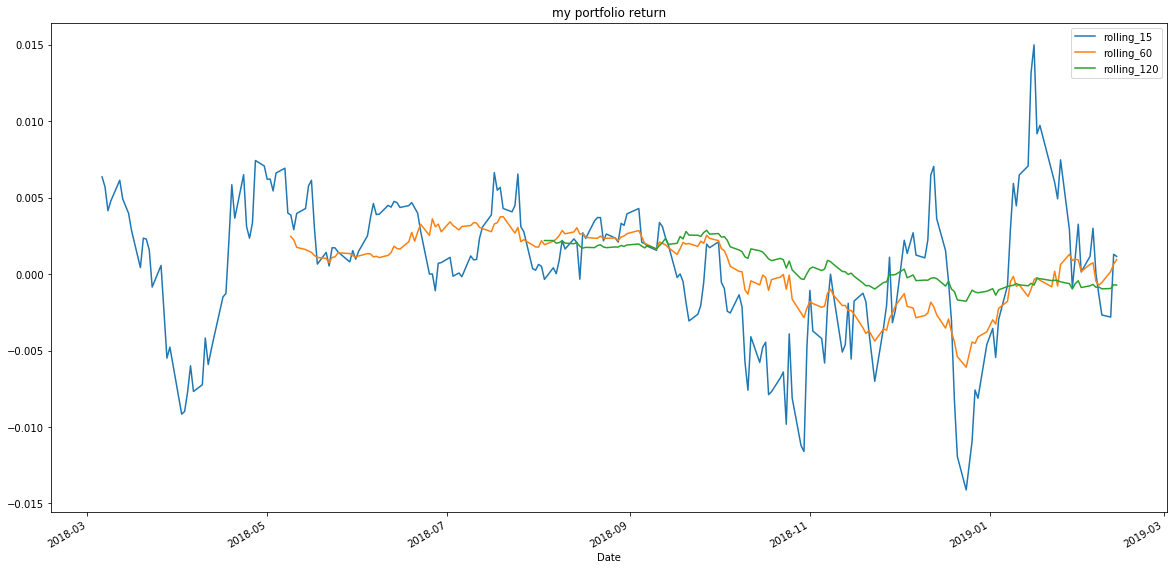

In [54]:
my_portfolio_rolling_15_return = portfolio_returns[["Travis folio"]].rolling(window = 15).mean()
my_portfolio_rolling_60_return = portfolio_returns[["Travis folio"]].rolling(window = 60).mean()
my_portfolio_rolling_120_return = portfolio_returns[["Travis folio"]].rolling(window = 120).mean()
ax = my_portfolio_rolling_15_return.plot(figsize = (20,10), title = 'my portfolio return')
my_portfolio_rolling_60_return.plot(ax = ax)
my_portfolio_rolling_120_return.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

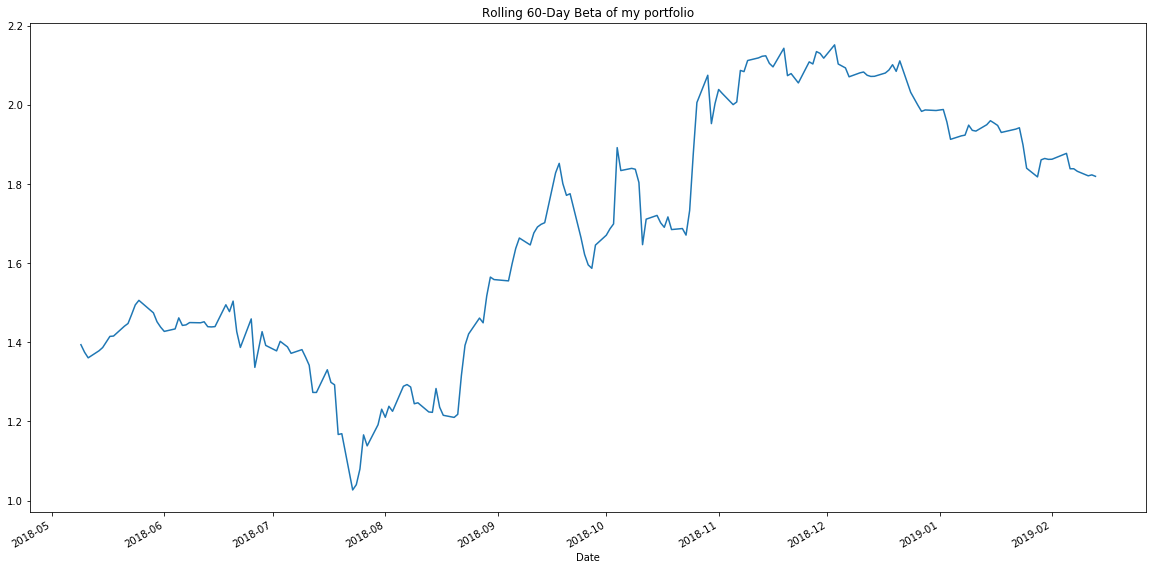

In [55]:
# Beta
rolling_covariance = portfolio_returns['Travis folio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

In [64]:
# sharpe ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))
# show the sharpes.. .
sharpe_ratios

Travis folio                   0.575967
SOROS FUND MANAGEMENT LLC     -0.101251
PAULSON & CO.INC.              0.104582
TIGER GLOBAL MANAGEMENT LLC   -1.046289
BERKSHIRE HATHAWAY INC         0.031558
Algo 1                         2.173865
Algo 2                        -0.031332
sp500                          0.299635
dtype: float64

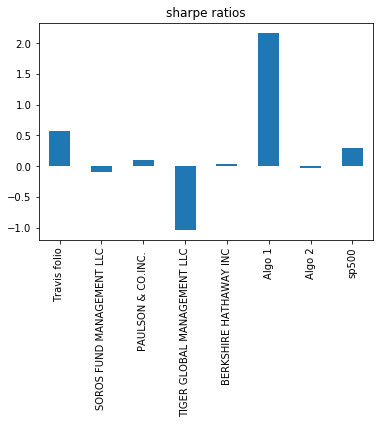

In [57]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

In [65]:
#  correlation analysis to determine which stocks (if any) are correlated

In [69]:
correlation_my_portfolio = portfolio_returns.corr().loc[:,"Travis folio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]


BERKSHIRE HATHAWAY INC    0.823011
Name: Travis folio, dtype: float64